In [3]:
!pip install qiskit

[0.70710678 0.         0.70710678]


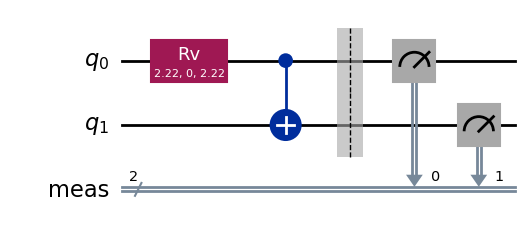

In [16]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram, plot_state_city
from qiskit.circuit.library import UnitaryGate
import numpy as np
import math

rotation_vector = np.array([1,0,1])
rotation_vector = rotation_vector / np.sqrt((rotation_vector.dot(rotation_vector)))
print(rotation_vector)
magnitude = math.pi
rotation_vector = rotation_vector * magnitude
 
# matrix = [[1, 0, 0, 0],
#           [0, 1, 0, 0],
#           [0, 0, 0, 1],
#           [0, 0, 1, 0]]

# gate = UnitaryGate(matrix)
 
circuit = QuantumCircuit(2) # ,2

# circuit.h(0)

# circuit.append(gate, [0, 1])

circuit.rv(*rotation_vector,0)

circuit.cx(0,1)

circuit.measure_all()
# circuit.measure(0,0)

circuit.draw("mpl")



In [17]:
from qiskit_aer import AerSimulator

# Transpile for simulator
simulator = AerSimulator()
circuit = transpile(circuit, simulator)

{'00': 526, '11': 498}
{'11': 524, '00': 500}
{'00': 519, '11': 505}
{'11': 547, '00': 477}
{'00': 533, '11': 491}
{'11': 517, '00': 507}
{'11': 503, '00': 521}
{'11': 495, '00': 529}
{'11': 519, '00': 505}
{'11': 524, '00': 500}
{'11': 493, '00': 531}
{'00': 493, '11': 531}
{'00': 525, '11': 499}
{'11': 517, '00': 507}
{'00': 508, '11': 516}
{'11': 505, '00': 519}
{'00': 516, '11': 508}
{'11': 477, '00': 547}
{'11': 532, '00': 492}
{'00': 513, '11': 511}
{'11': 501, '00': 523}
{'11': 504, '00': 520}
{'00': 521, '11': 503}
{'00': 521, '11': 503}
{'00': 485, '11': 539}
{'11': 502, '00': 522}
{'11': 531, '00': 493}
{'00': 529, '11': 495}
{'11': 495, '00': 529}
{'00': 510, '11': 514}
{'11': 494, '00': 530}
{'00': 513, '11': 511}
{'11': 499, '00': 525}
{'00': 508, '11': 516}
{'11': 515, '00': 509}
{'11': 505, '00': 519}
{'00': 534, '11': 490}
{'11': 514, '00': 510}
{'11': 500, '00': 524}
{'00': 516, '11': 508}
{'11': 504, '00': 520}
{'00': 517, '11': 507}
{'11': 534, '00': 490}
{'11': 510,

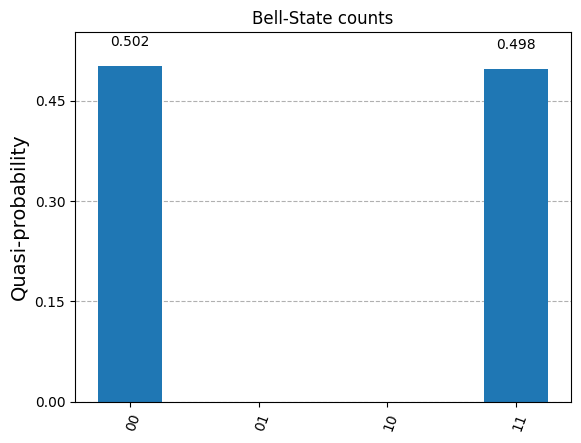

In [19]:
# Run and get counts
c00 = 0
c10 = 0
c01 = 0
c11 = 0
n=100
for _ in range(n):
    result = simulator.run(circuit).result()
    counts = result.get_counts(circuit)
    print(counts)
    try:
        c00+=counts['00']
        
    except KeyError: pass
    try:
        c10+=counts ['10']
        
    except KeyError: pass
    try:
        c01+=counts['01']
        
    except KeyError: pass
    try:
        c11+=counts ['11']
        
    except KeyError: pass

counts = {"00":c00/n, "01":c01/n, "10":c10/n, "11":c11/n}
print(counts)
plot_histogram(counts, title='Bell-State counts')